# O que vende um carro?

Centenas de propagandas gratuitas de veículos são publicadas no site todos os dias. Estudar os dados coletados nos últimos anos e determinar quais fatores influenciaram o preço de um veículo.

## Iniciação

Carregando as bibliotecas

In [ ]:
# Carregando todas as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Carregue dados

In [ ]:
# Carregue o arquivo com os dados em um DataFrame
df = pd.read_csv('/datasets/vehicles_us.csv')


### Explore os dados iniciais

O conjunto de dados contém os seguintes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel etc.
- `odometer` — a quilometragem do veículo quando a propaganda foi publicada
- `transmission`
- `paint_color`
- `is_4wd` — Se o veículo é 4 por 4 (tipo Booleano)
- `date_posted` — a data que a propaganda foi publicada
- `days_listed` — dias desde a publicação até a retirada


In [ ]:
# imprima as informações gerais/resumidas sobre o DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [ ]:
# imprima uma amostragem dos dados
df.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [ ]:
df.tail()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71
51524,6300,2014.0,nissan altima,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-06-05,10


In [ ]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [ ]:
df.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed
price,1.000000,0.428656,0.296627,-0.420299,NaN,-0.000682
model_year,0.428656,1.000000,-0.148040,-0.473948,NaN,-0.005703
cylinders,0.296627,-0.148040,1.000000,0.090160,NaN,0.005517
odometer,-0.420299,-0.473948,0.090160,1.000000,NaN,0.003804
is_4wd,NaN,NaN,NaN,NaN,NaN,NaN
days_listed,-0.000682,-0.005703,0.005517,0.003804,NaN,1.000000


In [ ]:
df.isna().mean().sort_values(ascending = False)

is_4wd          0.503697
paint_color     0.179854
odometer        0.153168
cylinders       0.102086
model_year      0.070238
price           0.000000
model           0.000000
condition       0.000000
fuel            0.000000
transmission    0.000000
type            0.000000
date_posted     0.000000
days_listed     0.000000
dtype: float64

Depois de fazer uma breve análise sobre os dados foi percebido que no DataFrame existem 51525 linhas e 13 colunas, e que existem colunas com dados faltantes, como por exemplo: model_year (7.0%), cylinders(10.2%), odometer (15.3%), paint_color (17.9%) e is_4wd (50,4%). Os dados podem estar faltando por motivos de importação, erro humano, desconhecimento do veículo e outros fatores, antes de tratar esses valores, vou procurar uma relação entre eles e as demais colunas e o resultado esperado do projeto.

Além disso, por uma análise inicial, não foi demosntrado nenhuma correlação forte entre os dados, mas vamos verificar mais adiante isso.

Além disso é possível perceber que existem valores muito baixos para preços de carro, ondo o mínimo é de 1.00.

## Cuide dos valores ausentes (se houver algum)

Começar a visualizar os dados por coluna:

**Model_Year**

In [ ]:
df['model_year'].isnull().sum()

3619

In [ ]:
df[df['model_year'].isnull()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60


Por enquanto não vi uma relação entre os dados faltantes em model_years e demais colunas. Vou deixar esses valores assim e se precisar eu trabalho eles mais tarde.

## **cylinders**

In [ ]:
df[df['cylinders'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,NaN,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,NaN,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,NaN,2019-01-23,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51429,3250,2004.0,toyota camry,good,NaN,gas,179412.0,automatic,sedan,NaN,NaN,2018-07-02,25
51442,28990,2018.0,ford f150,excellent,NaN,gas,10152.0,automatic,truck,white,1.0,2018-06-13,47
51460,5995,2007.0,ford fusion,excellent,NaN,gas,88977.0,manual,sedan,silver,NaN,2019-03-27,66
51477,6499,2007.0,acura tl,good,NaN,gas,112119.0,automatic,sedan,white,NaN,2018-06-22,28


In [ ]:
df.groupby('type')['cylinders'].mean()

type
SUV            5.905017
bus            9.100000
convertible    6.963415
coupe          6.451225
hatchback      4.159215
mini-van       5.966151
offroad        6.177083
other          5.688889
pickup         7.187440
sedan          4.574601
truck          7.498557
van            6.404930
wagon          4.879448
Name: cylinders, dtype: float64

In [ ]:
df.groupby('type')['cylinders'].median()

type
SUV             6.0
bus            10.0
convertible     8.0
coupe           6.0
hatchback       4.0
mini-van        6.0
offroad         6.0
other           6.0
pickup          8.0
sedan           4.0
truck           8.0
van             6.0
wagon           4.0
Name: cylinders, dtype: float64

Considero que a variável que mais interfere na quantidade de cilindros de um carro é o tipo do mesmo. Por isso vou corrigir os dados faltantes da coluna Cylinders de acordo com a mediana dos cilindros por tipo de veículo.

In [ ]:
def cilindros(row):
    if pd.isna(row['cylinders']):
        if row['type'] == 'SUV' or row['type'] == 'coupe' or row['type'] == 'mini-van' or row['type'] == 'offroad' or row['type'] == 'other' or row['type'] == 'van':
            return 6
        elif row['type'] == 'bus':
            return 10
        elif row['type'] == 'convertible' or row['type'] == 'pickup' or row['type'] == 'truck':
            return 8
        elif row['type'] == 'hatchback' or row['type'] == 'sedan' or row['type'] == 'wagon':
            return 4
        else:
            return 0
    else:
        return row['cylinders']

In [ ]:
cilindros(df[df['cylinders'].isna()].iloc[3])

6

In [ ]:
cilindros(df[df['cylinders'].isna()].iloc[4])

8

In [ ]:
cilindros(df[df['cylinders'].isna()].iloc[60])

6

In [ ]:
df['cylinders'] = df.apply(cilindros, axis=1)

In [ ]:
df[df['cylinders'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


Os dados ausentes foram todos substituídos

## ***Odometer***

In [ ]:
df[df['odometer'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,NaN,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51498,15900,2011.0,gmc sierra 1500,excellent,8.0,gas,NaN,automatic,truck,NaN,1.0,2019-01-25,69
51507,29500,2012.0,toyota tundra,good,8.0,gas,NaN,automatic,pickup,grey,1.0,2018-05-01,31
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89


In [ ]:
df.groupby('condition')['odometer'].mean().sort_values()

condition
new           43476.056000
like new      79426.738166
excellent    106687.682258
good         129919.930980
salvage      140919.989796
fair         183062.233577
Name: odometer, dtype: float64

Considerei que a quilometragem do veículo pode estar relacionada ao estado de como o veículo se encontra, por isso vou corrigir a coluna 'odometer' de levando em conta a coluna 'condition'

Usei uma função para substituir os valores ausentes.

In [ ]:
def hodometro(row):
    if pd.isna(row['odometer']):
        if row['condition'] == 'new':
            return 43476.056000
        elif row['condition'] == 'like new':
            return 79426.738166
        elif row['condition'] == 'excellent':
            return 106687.682258
        elif row['condition'] == 'good':
            return 129919.930980
        elif row['condition'] == 'salvage':
            return 140919.989796
        elif row['condition'] == 'fair':
            return 183062.233577
        else:
            return 0
    else:
        return row['odometer']



In [ ]:
hodometro(df[df['odometer'].isna()].iloc[3])

106687.682258

In [ ]:
hodometro(df[df['odometer'].isna()].iloc[0])

183062.233577

In [ ]:
df['odometer'] = df.apply(hodometro, axis=1)

In [ ]:
df[df['odometer'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


Todos os dados ausentes foram preenchidos com a média dos valores de acordo com a condição do veículo.

## ***Paint_color***

In [ ]:
df[df['paint_color'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,NaN,1.0,2018-06-23,19
3,1500,2003.0,ford f-150,fair,8.0,gas,183062.233577,automatic,pickup,NaN,NaN,2019-03-22,9
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.000000,automatic,SUV,NaN,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.000000,automatic,pickup,NaN,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.000000,automatic,SUV,NaN,NaN,2018-08-22,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51502,7995,2011.0,chevrolet equinox,like new,4.0,gas,111088.000000,automatic,SUV,NaN,NaN,2019-04-01,175
51503,6595,2011.0,chevrolet malibu,excellent,4.0,gas,100780.000000,automatic,sedan,NaN,NaN,2019-02-27,73
51506,28900,2017.0,ford f150 supercrew cab xlt,good,6.0,gas,49225.000000,automatic,pickup,NaN,1.0,2019-04-11,25
51519,11750,2015.0,honda accord,excellent,4.0,gas,106687.682258,automatic,coupe,NaN,NaN,2018-11-24,89


Não considero que a pintura do veículo vá interferir no preço, por isso não vou corrigir esses dados

## ***is_4wd***

In [ ]:
df[df['is_4wd'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,183062.233577,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,NaN,2019-04-02,28
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.000000,automatic,sedan,white,NaN,2018-12-27,73
11,8990,2012.0,honda accord,excellent,4.0,gas,111142.000000,automatic,sedan,grey,NaN,2019-03-28,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.000000,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.000000,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.000000,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.000000,automatic,sedan,black,NaN,2018-07-02,71


Como essa coluna é um valor booleano que indica se o veículo é 4x4 ou não, possível levar em consideração que os valores ausentes são representados pelos veículos que não possuem essa característica.

In [ ]:
df['is_4wd'] = df['is_4wd'].fillna(0)

In [ ]:
df[df['is_4wd'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


In [ ]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,183062.233577,automatic,pickup,NaN,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,0.0,2019-04-02,28


Dados ausentes corrigidos, sendo 1.0 possuindo 4x4 e 0.0 sem essa função

## Corrija os tipos de dados

Agora que já foram preenchidos os valores ausentes, vamos mudar o tipo de dados da coluna date_posted



In [ ]:
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%dT%H:%M:%S')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    47906 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB


In [ ]:
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,183062.233577,automatic,pickup,NaN,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,0.0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.000000,automatic,sedan,black,0.0,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.000000,automatic,sedan,white,0.0,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.000000,automatic,sedan,blue,0.0,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.000000,automatic,sedan,black,0.0,2018-07-02,71


In [ ]:
#Valores Duplicados
df.duplicated().sum()

0

## Enriqueça os dados

Melhorando o data frame para fazer as análises

In [ ]:
# Adicione valores data/hora para quando a propaganda estiver colocada
df['dia_semana_propaganda'] = df['date_posted'].dt.weekday
df['mes_propaganda'] = df['date_posted'].dt.month
df['ano_propaganda'] = df['date_posted'].dt.year
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dia_semana_propaganda,mes_propaganda,ano_propaganda
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,NaN,1.0,2018-06-23,19,5,6,2018
1,25500,NaN,ford f-150,good,6.0,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019
3,1500,2003.0,ford f-150,fair,8.0,gas,183062.233577,automatic,pickup,NaN,0.0,2019-03-22,9,4,3,2019
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.000000,automatic,sedan,black,0.0,2018-10-03,37,2,10,2018
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.000000,automatic,sedan,white,0.0,2018-11-14,22,2,11,2018
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.000000,automatic,sedan,blue,0.0,2018-11-15,32,3,11,2018
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.000000,automatic,sedan,black,0.0,2018-07-02,71,0,7,2018


In [ ]:
# Adicione a idade do veículo quando a propaganda for colocada
df['idade'] = df['ano_propaganda']-df['model_year']
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dia_semana_propaganda,mes_propaganda,ano_propaganda,idade
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,NaN,1.0,2018-06-23,19,5,6,2018,7.0
1,25500,NaN,ford f-150,good,6.0,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018,NaN
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,6.0
3,1500,2003.0,ford f-150,fair,8.0,gas,183062.233577,automatic,pickup,NaN,0.0,2019-03-22,9,4,3,2019,16.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.000000,automatic,sedan,black,0.0,2018-10-03,37,2,10,2018,5.0
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.000000,automatic,sedan,white,0.0,2018-11-14,22,2,11,2018,16.0
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.000000,automatic,sedan,blue,0.0,2018-11-15,32,3,11,2018,9.0
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.000000,automatic,sedan,black,0.0,2018-07-02,71,0,7,2018,5.0


In [ ]:
# Adicione a quilometragem média por ano
df[df['idade'] ==0]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dia_semana_propaganda,mes_propaganda,ano_propaganda,idade
19,13990,2018.0,hyundai elantra,excellent,4.0,gas,31932.0,automatic,sedan,red,0.0,2018-08-25,27,5,8,2018,0.0
71,23300,2018.0,nissan frontier crew cab sv,good,6.0,gas,27493.0,other,pickup,NaN,1.0,2018-10-13,36,5,10,2018,0.0
78,23800,2019.0,nissan frontier crew cab sv,good,6.0,gas,10899.0,other,pickup,silver,1.0,2019-02-28,30,3,2,2019,0.0
99,39950,2018.0,chevrolet silverado,excellent,8.0,gas,18500.0,automatic,truck,NaN,1.0,2018-08-05,16,6,8,2018,0.0
106,21500,2019.0,nissan frontier crew cab sv,good,6.0,gas,16168.0,other,pickup,white,0.0,2019-03-29,70,4,3,2019,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51376,27890,2018.0,ram 1500,excellent,8.0,gas,9446.0,automatic,truck,NaN,1.0,2018-05-06,39,6,5,2018,0.0
51442,28990,2018.0,ford f150,excellent,8.0,gas,10152.0,automatic,truck,white,1.0,2018-06-13,47,2,6,2018,0.0
51446,15999,2018.0,chevrolet malibu,excellent,4.0,gas,50502.0,automatic,sedan,black,0.0,2018-07-28,8,5,7,2018,0.0
51447,33990,2019.0,ram 1500,excellent,8.0,gas,9000.0,automatic,truck,white,1.0,2019-01-25,36,4,1,2019,0.0


In [ ]:
df['km_ano'] = df['odometer']/df['idade']

In [ ]:
def km_ano(row):
  for row in df['km_ano']:
    if df['idade'] == 0:
      return df['km_ano'].fillna(df['odometer'],inplace=True)
    elif df['idade'] != 0:
      return df['km_ano'].fillna(df['odometer']/df['idade'],inplace=True)

In [ ]:
df['km_ano'].replace([np.inf, -np.inf], 0, inplace=True)

In [ ]:
df.isnull().mean().sort_values(ascending = False)

paint_color              0.179854
km_ano                   0.070277
model_year               0.070238
idade                    0.070238
model                    0.000000
condition                0.000000
cylinders                0.000000
fuel                     0.000000
odometer                 0.000000
transmission             0.000000
type                     0.000000
is_4wd                   0.000000
date_posted              0.000000
days_listed              0.000000
dia_semana_propaganda    0.000000
mes_propaganda           0.000000
ano_propaganda           0.000000
price                    0.000000
dtype: float64

Temos 7% dos dados nulos, não vou mexer neles.

In [ ]:
# Categorizando de forma mais fácil de visualizar a condição do veículo
df['condition'].where(df['condition'] != 'new', 5, inplace = True)

In [ ]:
df['condition'].where(df['condition'] != 'like new', 4, inplace = True)

In [ ]:
df['condition'].where(df['condition'] != 'excellent', 3,inplace = True)


In [ ]:
df['condition'].where(df['condition'] != 'good', 2,inplace = True)


In [ ]:
df['condition'].where(df['condition'] != 'fair', 1,inplace = True)


In [ ]:
df['condition'].where(df['condition'] != 'salvage', 0,inplace = True)

In [ ]:
df['condition'] = pd.to_numeric(df['condition'], errors='coerce')
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dia_semana_propaganda,mes_propaganda,ano_propaganda,idade,km_ano
0,9400,2011.0,bmw x5,2,6.0,gas,145000.000000,automatic,SUV,NaN,1.0,2018-06-23,19,5,6,2018,7.0,20714.285714
1,25500,NaN,ford f-150,2,6.0,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018,NaN,NaN
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.000000,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,6.0,18333.333333
3,1500,2003.0,ford f-150,1,8.0,gas,183062.233577,automatic,pickup,NaN,0.0,2019-03-22,9,4,3,2019,16.0,11441.389599
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.000000,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,2.0,40451.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,4,6.0,gas,88136.000000,automatic,sedan,black,0.0,2018-10-03,37,2,10,2018,5.0,17627.200000
51521,2700,2002.0,honda civic,0,4.0,gas,181500.000000,automatic,sedan,white,0.0,2018-11-14,22,2,11,2018,16.0,11343.750000
51522,3950,2009.0,hyundai sonata,3,4.0,gas,128000.000000,automatic,sedan,blue,0.0,2018-11-15,32,3,11,2018,9.0,14222.222222
51523,7455,2013.0,toyota corolla,2,4.0,gas,139573.000000,automatic,sedan,black,0.0,2018-07-02,71,0,7,2018,5.0,27914.600000


## Verifique os dados limpos

In [ ]:
# imprima as informações gerais/resumidas sobre o DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   price                  51525 non-null  int64         
 1   model_year             47906 non-null  float64       
 2   model                  51525 non-null  object        
 3   condition              51525 non-null  int64         
 4   cylinders              51525 non-null  float64       
 5   fuel                   51525 non-null  object        
 6   odometer               51525 non-null  float64       
 7   transmission           51525 non-null  object        
 8   type                   51525 non-null  object        
 9   paint_color            42258 non-null  object        
 10  is_4wd                 51525 non-null  float64       
 11  date_posted            51525 non-null  datetime64[ns]
 12  days_listed            51525 non-null  int64         
 13  d

In [ ]:
# imprima uma amostragem dos dados
df.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dia_semana_propaganda,mes_propaganda,ano_propaganda,idade,km_ano
0,9400,2011.0,bmw x5,2,6.0,gas,145000.000000,automatic,SUV,NaN,1.0,2018-06-23,19,5,6,2018,7.0,20714.285714
1,25500,NaN,ford f-150,2,6.0,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018,NaN,NaN
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.000000,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,6.0,18333.333333
3,1500,2003.0,ford f-150,1,8.0,gas,183062.233577,automatic,pickup,NaN,0.0,2019-03-22,9,4,3,2019,16.0,11441.389599
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.000000,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,2.0,40451.500000
5,14990,2014.0,chrysler 300,3,6.0,gas,57954.000000,automatic,sedan,black,1.0,2018-06-20,15,2,6,2018,4.0,14488.500000
6,12990,2015.0,toyota camry,3,4.0,gas,79212.000000,automatic,sedan,white,0.0,2018-12-27,73,3,12,2018,3.0,26404.000000
7,15990,2013.0,honda pilot,3,6.0,gas,109473.000000,automatic,SUV,black,1.0,2019-01-07,68,0,1,2019,6.0,18245.500000
8,11500,2012.0,kia sorento,3,4.0,gas,104174.000000,automatic,SUV,NaN,1.0,2018-07-16,19,0,7,2018,6.0,17362.333333
9,9200,2008.0,honda pilot,3,6.0,gas,147191.000000,automatic,SUV,blue,1.0,2019-02-15,17,4,2,2019,11.0,13381.000000


## Estude os parâmetros fundamentais

 Vou fazer um estudo de como está a qualidade dos dados de algumas colunas, que serão utilizadas mais adiante para fazer as análises solicitadas.

Os parâmetros são
- Preço
- A idade do veículo quando a propaganda foi colocada
- Quilometragem
- Número de cilindros
- Condição

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

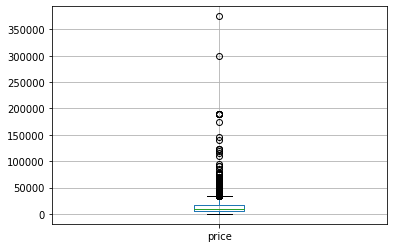

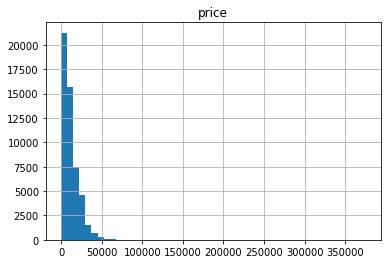

In [ ]:
# Verificar a distribuição dos dados da coluna 'price'
df.boxplot('price')
df.hist('price', bins=50)


array([[<AxesSubplot:title={'center':'idade'}>]], dtype=object)

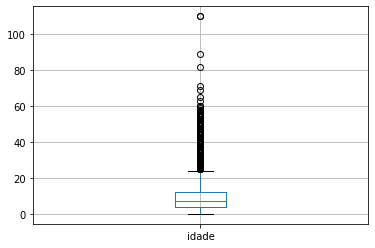

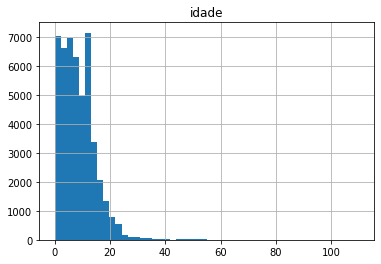

In [ ]:
# Verificar a distribuição dos dados da coluna 'idade'
df.boxplot('idade')
df.hist('idade', bins=50)

array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

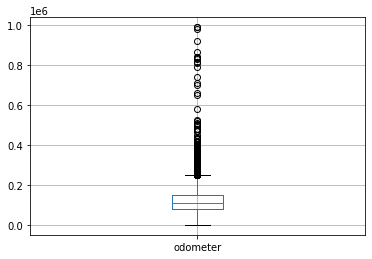

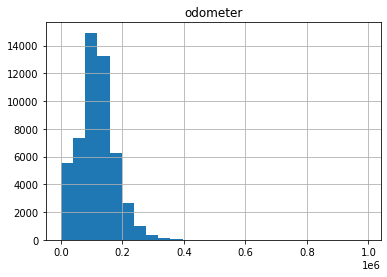

In [ ]:
# Verificar a distribuição dos dados da coluna 'odometer'
df.boxplot('odometer')
df.hist('odometer', bins=25)

array([[<AxesSubplot:title={'center':'cylinders'}>]], dtype=object)

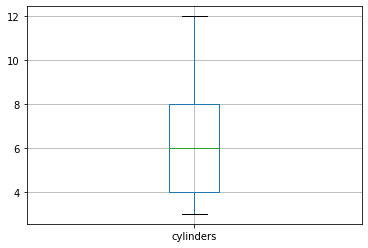

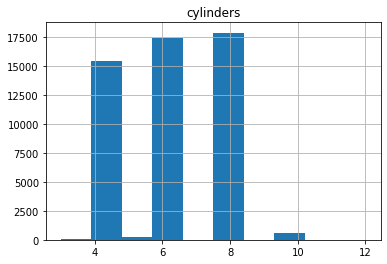

In [ ]:
# Verificar a distribuição dos dados da coluna 'cylinders'
df.boxplot('cylinders')
df.hist('cylinders', bins=10)

array([[<AxesSubplot:title={'center':'condition'}>]], dtype=object)

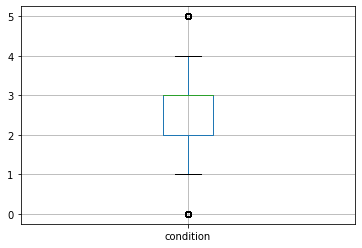

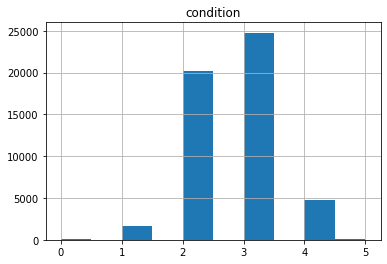

In [ ]:
# Verificar a distribuição dos dados da coluna 'condition'
df.boxplot('condition')
df.hist('condition', bins=10)

array([[<AxesSubplot:title={'center':'km_ano'}>]], dtype=object)

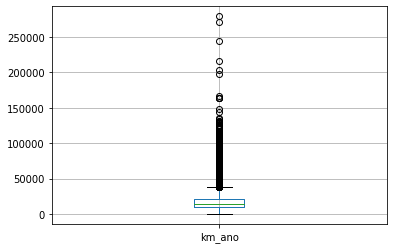

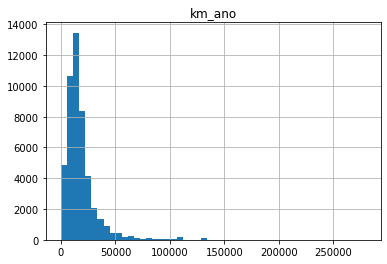

In [ ]:
df.boxplot('km_ano')
df.hist('km_ano', bins = 50)

Foi percebido que as colunas price, idade e odometer possuem muitos valores atípicos, enquanto a coluna condition possui poucos e a coluna cilinders não possui.

Na próxima etapa vou tratar os valores atípicos


## Estude e cuide dos valores atípicos

Bem, primeiro passei as colunas pelo método do diagrama de caixa, pois assim era possível vericifar a presença de valores atípicos e regiões onde eles começam a aparecer. Depois fiz o histograma de cada coluna para ver mais afundo o intervalo que julguei ser o que possui os dados mais limpos e que vão deixar a análise mais precisa.

Agora vou separar os dados limpos dos demais e assim fazer as análises em cima deles.


In [ ]:
# Armazenei os dados sem os valores atípicos em um DataFrame separado
df_novo = df.query('price <= 45000 and idade < 25 and odometer <250000 and km_ano < 45000')

In [ ]:
df_novo = df_novo.query('km_ano > 50')

In [ ]:
len(df_novo)/len(df)

0.8002523047064531

In [ ]:
df_novo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41233 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   price                  41233 non-null  int64         
 1   model_year             41233 non-null  float64       
 2   model                  41233 non-null  object        
 3   condition              41233 non-null  int64         
 4   cylinders              41233 non-null  float64       
 5   fuel                   41233 non-null  object        
 6   odometer               41233 non-null  float64       
 7   transmission           41233 non-null  object        
 8   type                   41233 non-null  object        
 9   paint_color            33807 non-null  object        
 10  is_4wd                 41233 non-null  float64       
 11  date_posted            41233 non-null  datetime64[ns]
 12  days_listed            41233 non-null  int64         
 13  d

In [ ]:
df_novo.describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,dia_semana_propaganda,mes_propaganda,ano_propaganda,idade,km_ano
count,41233.000000,41233.000000,41233.000000,41233.000000,41233.000000,41233.000000,41233.000000,41233.000000,41233.000000,41233.000000,41233.000000,41233.000000
mean,11234.706546,2009.601023,2.625324,6.096209,117697.904557,0.490578,39.626343,2.997041,6.557151,2018.319938,8.718914,16465.010856
std,8146.923936,4.927131,0.691511,1.643293,49813.698318,0.499917,28.257161,1.995093,3.492937,0.466458,4.922287,8338.797596
min,1.000000,1994.000000,0.000000,3.000000,103.000000,0.000000,0.000000,0.000000,1.000000,2018.000000,1.000000,51.500000
25%,4999.000000,2006.000000,2.000000,4.000000,84566.000000,0.000000,19.000000,1.000000,3.000000,2018.000000,5.000000,10608.333333
50%,8950.000000,2010.000000,3.000000,6.000000,115439.000000,0.000000,33.000000,3.000000,7.000000,2018.000000,8.000000,14666.666667
75%,15500.000000,2014.000000,3.000000,8.000000,149000.000000,1.000000,53.000000,5.000000,10.000000,2019.000000,12.000000,20666.666667
max,45000.000000,2018.000000,5.000000,12.000000,249870.000000,1.000000,271.000000,6.000000,12.000000,2019.000000,24.000000,44999.000000


Ficamos com 80% dos nossos dados originais.

## Estude os parâmetros fundamentais sem valores atípicos

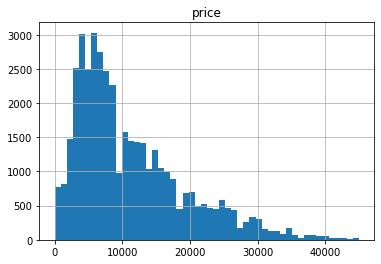

In [ ]:
df_novo.hist('price', bins=50);

Foi verificado que a maior parte dos dados estão no intervalo de 0 a 10000

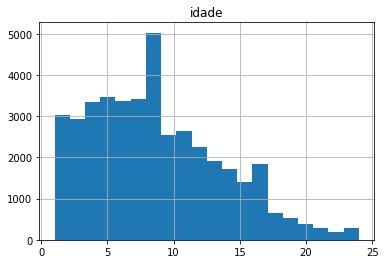

In [ ]:
df_novo.hist('idade', bins=20);

Tem um pico em aproximadanete 8 anos, e depois o número de veículos vai dimunindo conforme a idade aumenta

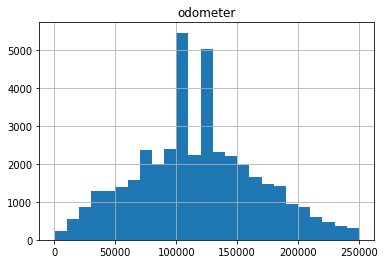

In [ ]:
df_novo.hist('odometer', bins=25);

Os números de veículos vão subindo a medida que a quilometragem sobe e tem dois picos entre 100000 e 125000, e depois o número de veículos vai dimunindo conforme a quilometragem aumenta

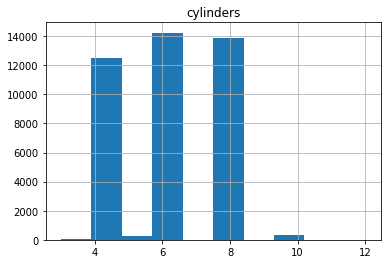

In [ ]:
df_novo.hist('cylinders', bins=10);

Os cilindros estão bem definidos, mas possuem valores em 3 e 10 cilindros

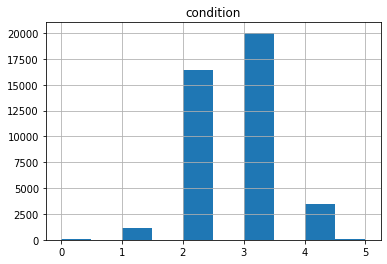

In [ ]:
df_novo.hist('condition', bins=10);

Existem veículos em todas as condições, mas a maior parte se encntra como Excelente (3) ou Bom (2).

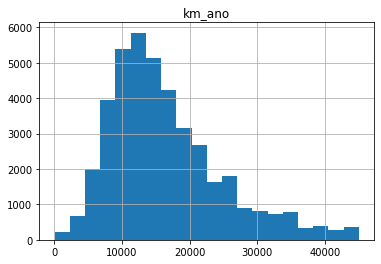

In [ ]:
df_novo.hist('km_ano', bins=20);

É possível perceber que os dados limpos nos fornecem gráficos mais limpos e que refletem de forma mais detalhada como a maioria dos nossos dados estão se comportando.

## Tempo de vida das propagandas


In [ ]:
df_novo['days_listed'].describe()

count    41233.000000
mean        39.626343
std         28.257161
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

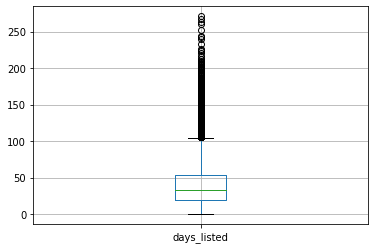

In [ ]:
df_novo.boxplot('days_listed');


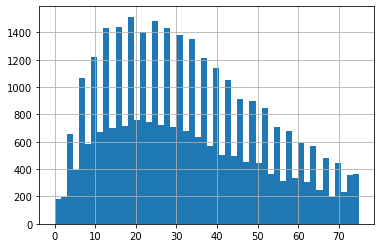

In [ ]:
df_novo['days_listed'].hist(bins=50, range=(0,75));

Pelo método describe() podemos ver que a média dos dias que a propaganda ficou listada foi de 39 dias e a mediana foi de 33 dias. Considero que abaixo de 05 dias a propaganda foi retirada rapidamente e acima de 100 dias foram os períodos anormalmente longos.

## Média de preços por cada tipo de veículo

In [ ]:
preco_mod = df_novo.pivot_table(index = 'type', values = 'price', aggfunc = 'mean')
preco_mod.reset_index(inplace=True)
preco_mod.sort_values('price',ascending = False)

,type,price
1,bus,17445.913043
10,truck,15496.311097
8,pickup,15022.717059
6,offroad,14370.191617
3,coupe,13256.742156
2,convertible,12703.711974
0,SUV,10453.375234
7,other,10012.544503
11,van,9858.175701
12,wagon,8917.289755


In [ ]:
final_data_novo = df_novo.merge(preco_mod, on='type', how='left', suffixes=('price', 'preco_mod'))
final_data_novo

,priceprice,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dia_semana_propaganda,mes_propaganda,ano_propaganda,idade,km_ano,pricepreco_mod
0,9400,2011.0,bmw x5,2,6.0,gas,145000.000000,automatic,SUV,NaN,1.0,2018-06-23,19,5,6,2018,7.0,20714.285714,10453.375234
1,5500,2013.0,hyundai sonata,4,4.0,gas,110000.000000,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,6.0,18333.333333,6636.510799
2,1500,2003.0,ford f-150,1,8.0,gas,183062.233577,automatic,pickup,NaN,0.0,2019-03-22,9,4,3,2019,16.0,11441.389599,15022.717059
3,14900,2017.0,chrysler 200,3,4.0,gas,80903.000000,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,2.0,40451.500000,6636.510799
4,14990,2014.0,chrysler 300,3,6.0,gas,57954.000000,automatic,sedan,black,1.0,2018-06-20,15,2,6,2018,4.0,14488.500000,6636.510799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41228,9249,2013.0,nissan maxima,4,6.0,gas,88136.000000,automatic,sedan,black,0.0,2018-10-03,37,2,10,2018,5.0,17627.200000,6636.510799
41229,2700,2002.0,honda civic,0,4.0,gas,181500.000000,automatic,sedan,white,0.0,2018-11-14,22,2,11,2018,16.0,11343.750000,6636.510799
41230,3950,2009.0,hyundai sonata,3,4.0,gas,128000.000000,automatic,sedan,blue,0.0,2018-11-15,32,3,11,2018,9.0,14222.222222,6636.510799
41231,7455,2013.0,toyota corolla,2,4.0,gas,139573.000000,automatic,sedan,black,0.0,2018-07-02,71,0,7,2018,5.0,27914.600000,6636.510799


In [ ]:
final_data_novo.groupby('type')['days_listed'].mean().sort_values(ascending = False)

type
bus            43.086957
offroad        42.011976
hatchback      41.233918
wagon          40.581040
SUV            40.027386
van            39.749533
sedan          39.567632
truck          39.414173
pickup         39.222432
coupe          39.112379
mini-van       38.923316
convertible    38.067961
other          37.518325
Name: days_listed, dtype: float64

<AxesSubplot:xlabel='type', ylabel='days_listed'>

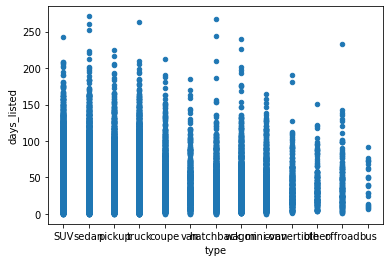

In [ ]:
final_data_novo.plot(x='type', y='days_listed',kind='scatter')

Foi percebido que os tipos de veículos que possuem os maiores preços estão são os "bus" e "truck". Já os dois que possuem a maior média de dias de propaganda são os veículos considerados "bus" e "offroad".

## Fatores de preço

<AxesSubplot:xlabel='transmission', ylabel='priceprice'>

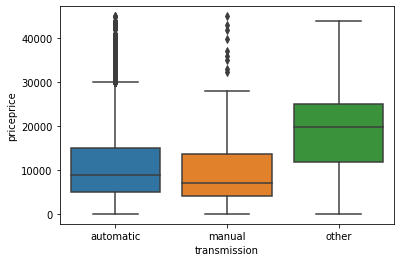

In [ ]:
sns.boxplot(data =final_data_novo.query('days_listed >=50'), x='transmission', y='priceprice')

É possível perceber que carros automáticos possuem mediana de preço acima dos carros manuais, e carros com outras transmissões, possuem valores ainda maiores.

<AxesSubplot:xlabel='priceprice', ylabel='paint_color'>

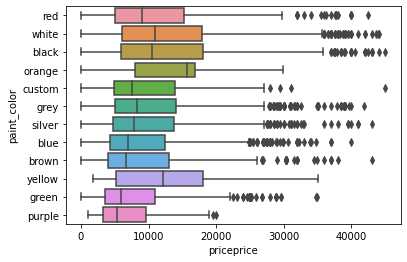

In [ ]:
sns.boxplot(data =final_data_novo.query('days_listed >=50'), x='priceprice', y='paint_color', orient = "h")

Sobre a cor, podemos ver que a que possui maior mediana de preço são carros laranjas e amarelos, mas estes não possuem valores atípicos, os que apresentaram maiores valores são os carros customizados e pretos.

<AxesSubplot:xlabel='idade', ylabel='priceprice'>

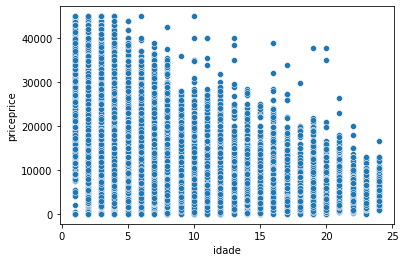

In [ ]:
sns.scatterplot(data =final_data_novo, x='idade', y='priceprice')

O preço tende a diminuir com o passar dos anos

<AxesSubplot:xlabel='odometer', ylabel='priceprice'>

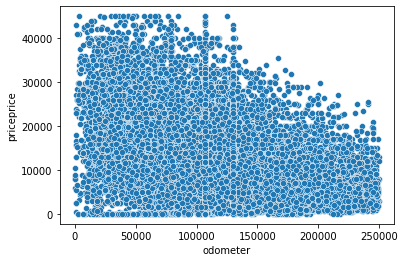

In [ ]:
sns.scatterplot(data =final_data_novo, x='odometer', y='priceprice')

Não está muito evidente, mas é possível ver uma leve tendência que quanto maior o valor da quilometragem, menor o valor do veículo

<AxesSubplot:xlabel='condition', ylabel='priceprice'>

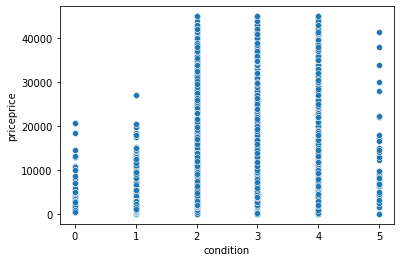

In [ ]:
sns.scatterplot(data =final_data_novo, x='condition', y='priceprice')

É possível ver que as condições 2,3 e 4 são as que apresentam maiores preços, mesmo estando bem distribuidos. Por isso não acho que possuem uma relaçaõ óbvia com o preço, pois existem outros fatores que podem ser levandos em conta.

In [ ]:
final_data_novo.corr()

,priceprice,model_year,condition,cylinders,odometer,is_4wd,days_listed,dia_semana_propaganda,mes_propaganda,ano_propaganda,idade,km_ano,pricepreco_mod
priceprice,1.000000,0.529211,0.205308,0.349841,-0.461142,0.357777,-0.000341,-0.009650,-0.032378,0.034469,-0.526466,0.281087,0.226416
model_year,0.529211,1.000000,0.275541,-0.138856,-0.560330,-0.003589,0.000781,-0.005116,-0.052693,0.057715,-0.995515,0.619814,0.294197
condition,0.205308,0.275541,1.000000,-0.064064,-0.310739,0.014939,0.001096,-0.001911,-0.016342,0.020731,-0.273848,0.068998,0.906773
cylinders,0.349841,-0.138856,-0.064064,1.000000,0.094481,0.420485,-0.003606,-0.007399,0.003658,-0.003930,0.138620,-0.049934,-0.057223
odometer,-0.461142,-0.560330,-0.310739,0.094481,1.000000,0.043239,0.005737,0.007193,0.036591,-0.037114,0.557364,0.083287,-0.309374
is_4wd,0.357777,-0.003589,0.014939,0.420485,0.043239,1.000000,0.005043,0.002477,0.004222,-0.001321,0.003467,0.047720,0.008072
days_listed,-0.000341,0.000781,0.001096,-0.003606,0.005737,0.005043,1.000000,0.001662,-0.009958,0.009031,0.000074,0.003063,0.004683
dia_semana_propaganda,-0.009650,-0.005116,-0.001911,-0.007399,0.007193,0.002477,0.001662,1.000000,0.006031,-0.007166,0.004442,-0.002871,-0.002806
mes_propaganda,-0.032378,-0.052693,-0.016342,0.003658,0.036591,0.004222,-0.009958,0.006031,1.000000,-0.822897,-0.025237,0.082383,-0.019546
ano_propaganda,0.034469,0.057715,0.020731,-0.003930,-0.037114,-0.001321,0.009031,-0.007166,-0.822897,1.000000,0.036992,-0.101254,0.021620


## Conclusão geral


O intuito deste projeto é analisar quais são as características dos veículos que podem influenciar no preço dos mesmos.

A primeira etapa foi limpar os dados de ausentes e duplicados. Para isso verifiquei dados faltantes nas colunas e suas porcentagens:
is_4wd          0.503697
paint_color     0.179854
odometer        0.153168
cylinders       0.102086
model_year      0.070238

Na coluna is_4wd é de valores booleanos, ou seja, 0(falso) e 1 (verdadeiro), como só foram mostrados valores 1 na coluna, levei em consideração que os valores ausentes eram 0 e substitui dessa forma.
Na coluna Odometer considerei que a condição do veículo pode interferir no resultado e por isso reajustei os valores ausentes pela média dos mesmos.
Na coluna cylinders levei em conta o tipo de veículo e readequei de acordo com a mediana.
Para a coluna model_year, como representam apenas 7% de dados faltantes, resolvi não mexer. O mesmo para coluna paint_color, pois não vi relação óbvia entre a cor do veículo e outros dados.

No data frame não tinha dados duplicados!!

Após isso verifiquei algumas colunas que considerei mais importantes sobre como estavam a distribuição deles sem um funil.

E começei a melhorar os dados, alterando os tipos de dados quando necessários e retirando valores atípicos que poderiam influenciar nossa análise. Criei um novo data frame para esses dados comecei a fazer novas análises, como descrito anteriormente.


Começei a tirar as conclusões, priemiro foi percebido que os tipos de veículos que possuem os maiores preços estão são os "bus" e "truck". Já os dois que possuem a maior média de dias de propaganda são os veículos considerados "bus" e "offroad".

E sobre os fatores que mais podem impactar o preço do veículo, pela tabela de correlação, podemos citar:
model_year - mais atual, maior o valor
odometer - menos km rodados, maior o valor
idade - menor idade, maior valor

E sobre as análises individuais das colunas importantes, expliquei minhas conclusões embaixo de cada gráfico.